<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Argument-for-using-ANNs-in-time-series-analysis" data-toc-modified-id="Argument-for-using-ANNs-in-time-series-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Argument for using ANNs in time series analysis</a></span></li><li><span><a href="#Elman-and-Jordan-NNs" data-toc-modified-id="Elman-and-Jordan-NNs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Elman and Jordan NNs</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Modelling-via-Elamn-NN" data-toc-modified-id="Modelling-via-Elamn-NN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling via Elamn NN</a></span></li><li><span><a href="#Modelling-via-Jordan-NN" data-toc-modified-id="Modelling-via-Jordan-NN-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling via Jordan NN</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Introduction

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Partially recurrent NNs - Elman and Jordan NNs

</font>
</div>

# Argument for using ANNs in time series analysis

<div class="alert alert-block alert-info">
<font color=black>

- **What is the issue?** The presence of trend and seasonal variation can be hard to estimate and/or remove. The chief difficultly is that the underlying dynamics generating the data are unknown. 
- **Traditional statistics approach**: require the specification of an assumed time-series model, such as auto-regressive models, Linear Dynamical Systems, or Hidden Markov Model which require skills.
- **ANNs approach**: The great thing about neural networks is that you do not need to specify the exact nature of the relationship (linear, non-linear, seasonality, trend) that exists between the input and output. The hidden layers of a deep neural network (DNN) remove the need to prespecify the nature of the data generating mechanism. This is because they can approximate extremely complex decision functions. 


- The hidden layer(s) act as a generic function approximator. For a recurrent neural network the hidden and delay units perform a similar function.

</font>
</div>

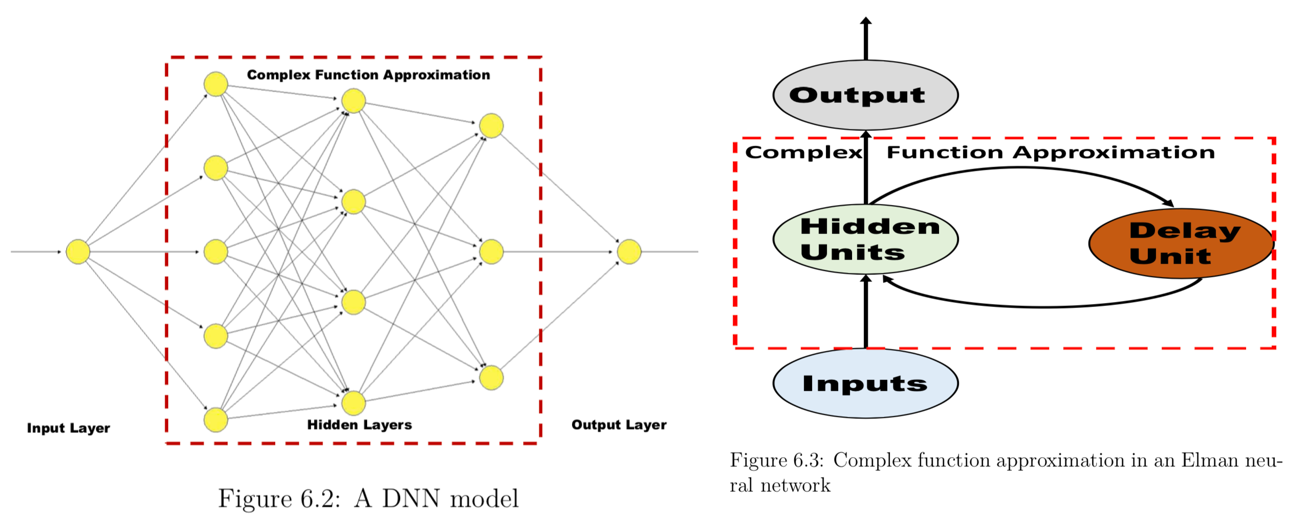

# Elman and Jordan NNs

<div class="alert alert-block alert-info">
<font color=black>

- Elman NNs are a popular **partially** recurrent NNs. Initially designed to learn sequential or time-varying patterns. In an Elman neural network the number of neurons in the context layer is equal to the number of neurons in the hidden layer. In addition, the context layer neurons are fully connected to all the neurons in the hidden layer. Memory occurs through the delay (context) units which are fed by hidden layer neurons.


- **Jordan NNs** is a single hidden layer feed forward neural network. It is similar to the Elman NN. The only difference is that the context (delay) neurons are fed from the output layer instead of the hidden layer. It therefore “remembers” the output from the previous time-step. Like the Elman neural network, it is useful for predicting time series observations which have a short memory.

</font>
</div>

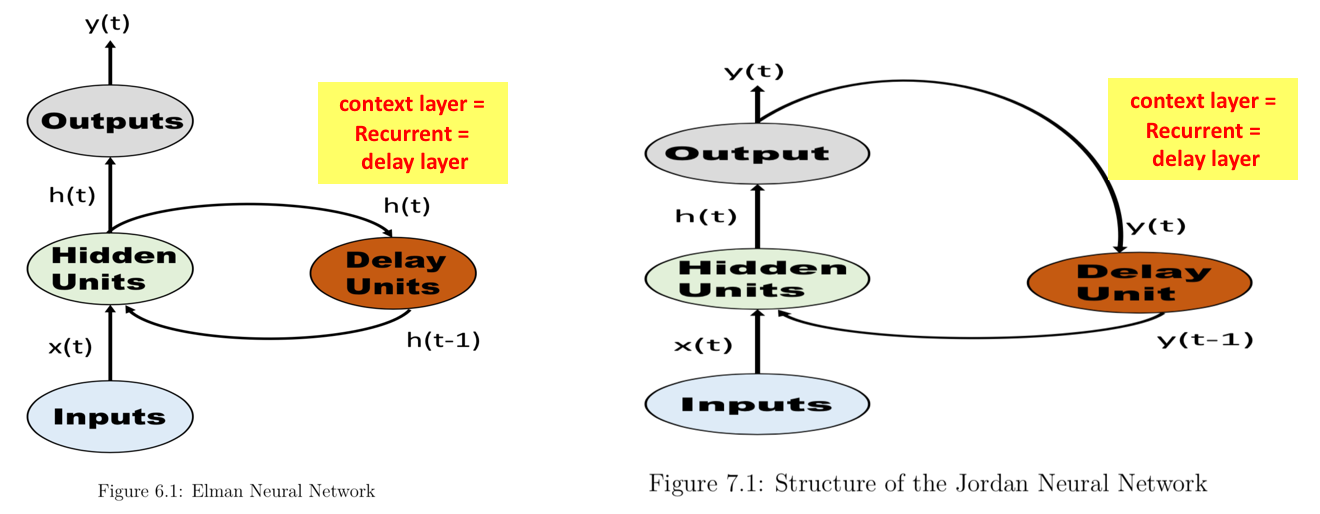

# Import modules

In [125]:
import numpy as np
import pandas as pd
import urllib
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
# You need to run it only with python 2.7.x!
from pyneurgen.neuralnet import NeuralNet 
from pyneurgen.recurrent import ElmanSimpleRecurrent, JordanRecurrent

# Import dataset

<div class="alert alert-block alert-info">
<font color=black>

-  If you have lived in Singapore, you will know that anyone who wants to register a new vehicle must first obtain a Certificate of Entitlement (**COE**). 
- It gives the holder the right to vehicle ownership and access to the very limited road space in the tropical island city-state. The number of COEs issued is limited and they can only be obtained through an open bidding system

</font>
</div>

In [104]:
"""
Use this code snippet if you prefer to automatically donwload the dataset form the web
url ="https://goo.gl/WymYzd" 
localPath = "./COE.xls" 
urllib.urlretrieve(url, loc)
"""

'\nUse this code snippet if you prefer to automatically donwload the dataset form the web\nurl ="https://goo.gl/WymYzd" \nlocalPath = "./COE.xls" \nurllib.urlretrieve(url, loc)\n'

In [105]:
Excel_file = pd.ExcelFile("../../DATASETS/COE.xls")

In [106]:
Excel_file

In [107]:
# How many sheets are there? Just one.
print(Excel_file.sheet_names)

['COE data']


In [108]:
data = Excel_file.parse("COE data")

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    265 non-null    datetime64[ns]
 1   COE$    265 non-null    float64       
 2   COE$_1  265 non-null    float64       
 3   #Bids   265 non-null    int64         
 4   Quota   265 non-null    int64         
 5   Open?   265 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 12.5 KB


# Data preparation

<div class="alert alert-block alert-info">
<font color=black><br>

- Drop column No 0 and 4.
- Select the target variable `COE$`
    
<br></font>
</div>

In [110]:
data.columns

Index(['DATE', 'COE$', 'COE$_1', '#Bids', 'Quota', 'Open?'], dtype='object')

In [111]:
x = data.drop(data.columns [[0,4,5]], axis = 1)
y = data['COE$']

In [112]:
x

,COE$,COE$_1,#Bids
0,7400.0,7750.0,656
1,11100.0,7400.0,1462
2,5002.0,11100.0,633
3,3170.0,5002.0,952
4,3410.0,3170.0,919
...,...,...,...
260,14156.0,12605.0,2122
261,14501.0,14156.0,1981
262,14669.0,14501.0,1991
263,13499.0,14669.0,1708


In [113]:
y

0       7400.0
1      11100.0
2       5002.0
3       3170.0
4       3410.0
        ...   
260    14156.0
261    14501.0
262    14669.0
263    13499.0
264    13301.0
Name: COE$, Length: 265, dtype: float64

In [114]:
x = x.apply(np.log)
# Adding back the "Open?" as we do not want to apply the log transform there
x = pd.concat([x, data["Open?"]], axis=1)

In [115]:
x

,COE$,COE$_1,#Bids,Open?
0,8.909235,8.955448,6.486161,0
1,9.314700,8.909235,7.287561,0
2,8.517593,9.314700,6.450470,0
3,8.061487,8.517593,6.858565,0
4,8.134468,8.061487,6.823286,0
...,...,...,...,...
260,9.557894,9.441849,7.660114,1
261,9.581973,9.557894,7.591357,1
262,9.593492,9.581973,7.596392,1
263,9.510371,9.593492,7.443078,1


<div class="alert alert-block alert-info">
<font color=black>

- However, we will use the `pyneurgen` library to build our Elman neural network. 
- It requires both the attributes and target be passed to it as a list. 

</font>
</div>

In [117]:
scaler_x = preprocessing.MinMaxScaler(
feature_range=(0, 1))
x = np.array(x).reshape((len(x),4 ))
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(
feature_range=(0, 1))
y = np.array(y).reshape((len(y), 1)) 
y=np.log(y)
y = scaler_y.fit_transform(y) 

In [118]:
y = y.tolist()
x = x.tolist()

# Modelling via Elamn NN

In [ ]:
import random random.seed(2016)
fit1 = NeuralNet () input_nodes = 4
hidden_nodes = 7
output_nodes = 1 
fit1.init_layers(input_nodes, [hidden_nodes], output_nodes , ElmanSimpleRecurrent())
fit1.randomize_network() 
fit1.layers[1].set_activation_type("sigmoid") 
fit1.set_learnrate(0.05)
fit1.set_all_inputs(x) 
fit1.set_all_targets(y)

In [ ]:
# The train and test samples are obtained as follows:
length = len(x)
learn_end_point = int(length * 0.95) 
fit1.set_learn_range(0, learn_end_point) 
fit1.set_test_range(learn_end_point + 1, length -1)

In [ ]:
fit1.learn(epochs=100, show_epoch_results= True,random_testing=False)

In [ ]:
mse = fit1.test()
print("test set MSE =", np.round(mse ,6))

In [ ]:
# Transforming the predictions back to their original scale
pred = [item[1][0] for item in fit1. test_targets_activations]
pred1 = scaler_y.inverse_transform(np.array (pred).reshape((len(pred), 1)))
pred1 = np.exp(pred1)

# Modelling via Jordan NN

<div class="alert alert-block alert-info">
<font color=black>

- The `existing_weight_factor` is associated with the delay node. It controls the weight associated with the previous output. 

</font>
</div>

In [ ]:
import random random.seed(2016)
fit1 = NeuralNet () 
input_nodes = 4
hidden_nodes = 7 
output_nodes = 1 
existing_weight_factor = 0.9

In [ ]:
fit1 . init_layers (input_nodes , [ hidden_nodes ] ,
output_nodes ,
JordanRecurrent(existing_weight_factor)) 
fit1.randomize_network()
fit1.layers [1]. set_activation_type( ’sigmoid ’) 
fit1.set_learnrate (0.05)
fit1.set_all_inputs(x)
fit1.set_all_targets (y)

In [ ]:
length = len(x)
learn_end_point = int ( length ∗ 0.95)
fit1.set_learn_range (0 , learn_end_point) 
fit1.set_test_range(learn_end_point + 1, length −1)

In [ ]:
fit1.learn(epochs=100, show_epoch_results= True,random_testing=False)

In [ ]:
mse = fit1.test()
print()"test set MSE =",np.round(mse ,6))

# References

<div class="alert alert-block alert-warning">
<font color=black>

- Lewis, N. D. "Deep Time Series Forecasting with Python." Create Space Independent Publishing Platform (2016).
- [Link to the xls dataset download](https://goo.gl/WymYzd)
- [How to change dataframe value entries](https://flutterq.com/attributeerror-dataframe-object-has-no-attribute-set_value/)

</font>
</div>

# Conclusions

<div class="alert alert-block alert-danger">
<font color=black><br>

- It can only be run on python 2.x and as far I am aware there is a patch for 3.x which I have not tried.

<br></font>
</div>